Here we briefly report some of the consideration that led to our futures choice for the kalman filter.
We decided to not report all of the data exploration we did, but just the what seemed to be more interesting

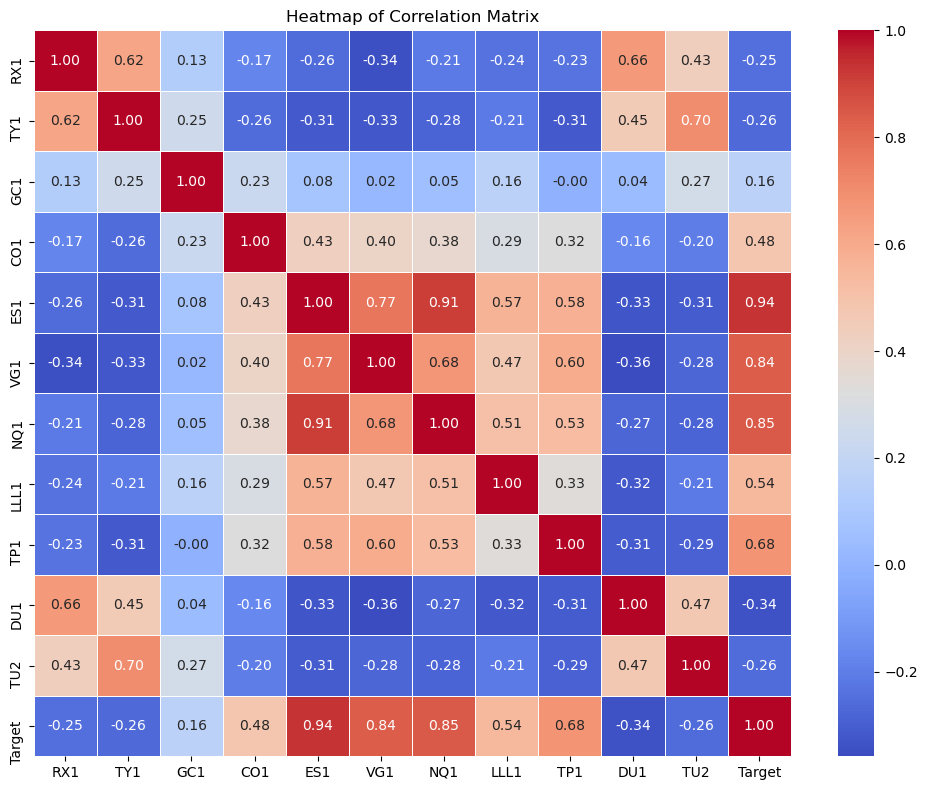

VIF:  [1.2699409505943455, 1.196532650627764, 1.3387001698801604, 1.7302561608262714, 1.5569262742130368, 1.434671999907787]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


data = pd.read_excel('InvestmentReplica.xlsx', sheet_name='Replica')  
dates = data['Date'].values  
data.drop(columns=['Date'], inplace=True)


data['Target'] = 0.25 * data['HFRXGL'] + 0.5 * data['MXWO'] + 0.25 * data['LEGATRUU']


returns = data.pct_change()

returns.dropna(inplace=True)


features_all = returns.columns.drop(['HFRXGL', 'MXWO', 'LEGATRUU','MXWD'])
features = returns.columns.drop(['HFRXGL', 'MXWO', 'LEGATRUU','MXWD','Target','TY1','VG1','NQ1','LLL1','DU1']) 


features_prices = data[features].values
X = returns[features].values    


#HEATMAP
plt.figure(figsize=(10, 8))
correlation_matrix = returns[features_all].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.tight_layout()
plt.show()


vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print('VIF: ',vif)

# Here we have plotted the correlation matrix of all the original features and the target 
# variable and then, after making some feature selection as explained in the slides,
# we've computed the Variance Inflation Factor (VIF) of the remaining features

Looking at the heatmap, VG1, NQ1 and ES1 are highly correlated: we have chosen to remove  VG1 and NQ1 and to keep ES1 since it has an higher correlation with the target variable. Moreover, among the two couple of german and american bonds, we have kept only one of each class: RX1 as german bond and TU2 as american one. Commodieties (CO1 and GC1) are not correlated with others, so we have kept them. Finally we have dropped also LLL1 and kept TP1 since they have similar correlations with other futures but TP1 was more correlated with the target

Regarding the VIF scores, they all fall below 5, according to the rule of thumb. 
We believe this step was necessary in order to avoid out kalman filter to overfit the index and lose way too much money due to very frequent change in the asset allocation that would result in high transaction fees.